In [1]:
from common import NWSL, Data, Colors, Fonts, Images, add_twitter_handle
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Data Collection

Read through stats to get the minutes played in each consecutive stint on a team.

In [39]:
season = "2024"

In [29]:
players = Data.get_nwsl_player_stats(include_early=True, season=season)
players

,season,date,home,away,player,team,number,position,is_starter,accurate_keeper_throws,...,att_obp_goal,att_pen_miss,assist_post,att_lg_left,back_pass,corner_kicks,penalty_saved,has_full_stats,goal_assists,is_playoffs
37147,2024,2024-03-16,KCC,POR,Adrianna Franch,KCC,21.0,Goalkeeper,True,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37148,2024,2024-03-16,KCC,POR,Hailie Mace,KCC,4.0,Defender,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37149,2024,2024-03-16,KCC,POR,Gabrielle Robinson,KCC,24.0,Defender,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37150,2024,2024-03-16,KCC,POR,Elizabeth Ball,KCC,7.0,Defender,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37151,2024,2024-03-16,KCC,POR,Ellie Wheeler,KCC,5.0,Defender,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37496,2024,2024-11-03,SD,LOU,Ary Borges,LOU,8.0,Substitute,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37498,2024,2024-11-03,SD,LOU,Ángela Barón,LOU,15.0,Substitute,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37500,2024,2024-11-03,SD,LOU,Milly Clegg,LOU,18.0,Substitute,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False
37501,2024,2024-11-03,SD,LOU,Parker Goins,LOU,21.0,Substitute,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False


In [30]:
players = players.groupby("player").agg(team=("team", "last")).reset_index()
players

,player,team
0,Abby Dahlkemper,BAY
1,Abby Erceg,LOU
2,Addisyn Merrick,UTA
3,Adriana,ORL
4,Adrianna Franch,KCC
...,...,...
354,Yazmeen Ryan,GFC
355,Yuki Nagasato,HOU
356,Zoe Burns,UTA
357,Zoe Matthews,HOU


In [32]:
stats = Data.get_nwsl_player_stats(include_early=True)
stats = stats.groupby("player").agg(minutes=("mins_played", "sum")).reset_index()
stats

,player,minutes
0,Abby Dahlkemper,12386.0
1,Abby Elinsky,580.0
2,Abby Erceg,17262.0
3,Abby Smith,5313.0
4,Abby Wambach,2510.0
...,...,...
931,Zoe Matthews,7.0
932,Zoe Morse,1896.0
933,Zoey Goralski,88.0
934,Ángela Barón,12.0


In [35]:
df = pd.merge(players, stats, on="player", how="left")
df = df.sort_values(["team", "minutes"])
df

,player,team,minutes
168,Jordan Brewster,BAY,9.0
248,Maya Doms,BAY,14.0
68,Caroline Conti,BAY,97.0
154,Jamie Shepherd,BAY,156.0
296,Princess Marfo,BAY,240.0
...,...,...,...
346,Trinity Rodman,WAS,6635.0
32,Andi Sullivan,WAS,9871.0
71,Casey Krueger,WAS,11236.0
43,Ashley Hatch,WAS,11506.0


In [36]:
df_avg = (
    df.groupby("team")
    .agg(avg_minutes=("minutes", "mean"))
    .sort_values("avg_minutes", ascending=False)
    .reset_index()
)
df_avg

,team,avg_minutes
0,GFC,5397.461538
1,LA,5276.208333
2,KCC,4459.222222
3,SD,4326.600000
4,LOU,4071.478261
5,NC,4040.739130
6,RGN,3739.750000
7,POR,3651.769231
8,BAY,3572.080000
9,CHI,3407.192308


In [37]:
bins = list(range(0, 6000, 1000))  + [19000]
data = df.groupby(['team', pd.cut(df["minutes"], bins)]).size().unstack()
data

minutes,"(0, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]","(5000, 19000]"
team,,,,,,
BAY,8,6,3,2,0,6
CHI,9,7,3,0,0,7
GFC,3,3,2,3,4,11
HOU,9,5,3,1,2,5
KCC,7,4,4,1,1,10
LA,4,2,3,2,3,10
LOU,4,7,3,0,0,9
NC,6,3,2,4,1,7
ORL,7,5,3,2,4,5


In [38]:
labels = []
for previous, current in zip(bins, bins[1:]):
    previous_fmt = (str(int(previous / 1000)) + "k").replace("0k", "0")
    current_fmt = (str(int(current / 1000)) + "k").replace("0k", "0")
    if current == bins[-1]:
        labels.append(previous_fmt + "+")
    else:
        labels.append(previous_fmt + "-" + current_fmt)
labels

['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k+']

# Visualization

<Figure size 1152x720 with 0 Axes>

<Figure size 6400x4000 with 0 Axes>

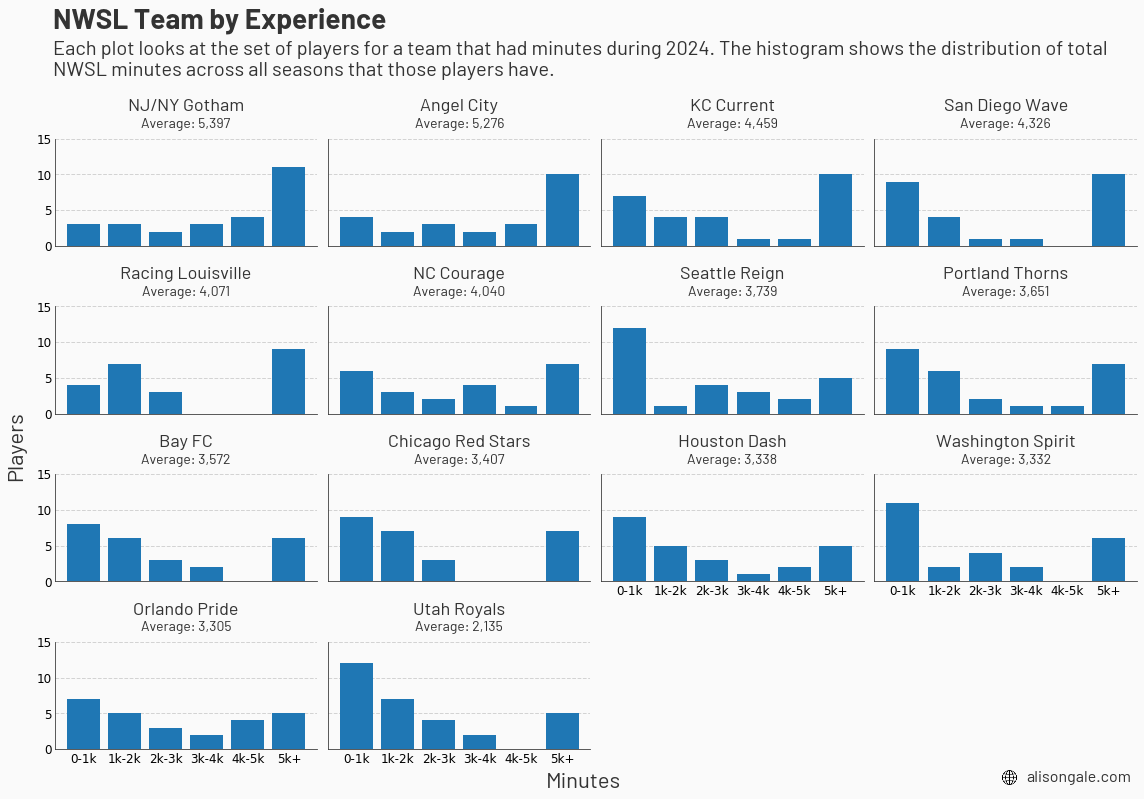

In [66]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (16, 10)
plt.figure(dpi=400, facecolor=Colors.WHITE)
ROWS = 4
COLS = 4
fig, axs = plt.subplots(ROWS, COLS)
fig.patch.set_facecolor(Colors.WHITE)

for i, row in df_avg.iterrows():
    team = row["team"]
    values = data.loc[team]

    ax = axs[int(i / COLS), i % COLS]
    ax.set_facecolor(Colors.WHITE)

    # Plot data
    ax.bar(list(range(0, len(bins) - 1)), values)

    # Title
    ax.set_title(
        NWSL.name(team), fontproperties=Fonts.BARLOW, size=18, color=Colors.BLACK, y=1.2
    )
    avg_mins = int(row["avg_minutes"])
    ax.text(
        2.5,
        16.5,
        "Average: " + f"{avg_mins:,}",
        ha="center",
        fontproperties=Fonts.BARLOW,
        size=14,
        color=Colors.BLACK,
    )

    # Axes & ticks
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(Colors.BLACK)
    ax.set_axisbelow(True)
    ax.grid(axis="y", which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)
    ax.tick_params(axis="both", which="both", length=0, labelsize=12)
    if i % COLS != 0:
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position("none")
    if (int(i / COLS) == ROWS - 2 and i % COLS >= 2) or (int(i / COLS) == ROWS - 1 and i % COLS < 2):
        ax.set_xticks(list(range(0, len(bins) - 1)))
        ax.set_xticklabels(labels)
        ax.xaxis.label.set_color(Colors.BLACK)
    else:
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position("none")

    ax.set_ylim([0, 15])
    ax.set_yticks([0, 5, 10, 15])
    ax.yaxis.label.set_color(Colors.BLACK)
    
# Clear empty plots
for i in range(len(df_avg.index), len(axs) * len(axs[0])):
    ax = axs[int(i / 4), i % 4]
    ax.set_axis_off()

# Axis labels
fig.supxlabel(
    "Minutes", x=0.51, y=0.02, fontproperties=Fonts.BARLOW, size=22, color=Colors.BLACK
)
fig.supylabel(
    "Players",
    x=0.01,
    fontproperties=Fonts.BARLOW,
    size=22,
    color=Colors.BLACK,
)


# Proper spacing between subplots
fig.tight_layout()


# Titles
plt.suptitle(
    "NWSL Team by Experience",
    x=0.05,
    y=1.11,
    fontproperties=Fonts.BARLOW_BOLD,
    ha="left",
    fontsize=28,
    color=Colors.BLACK,
)
plt.figtext(
    0.05,
    1.015,
    "Each plot looks at the set of players for a team that had minutes during 2024. The histogram shows the distribution of total\nNWSL minutes across all seasons that those players have.",
    fontproperties=Fonts.BARLOW,
    fontsize=20,
    color=Colors.BLACK,
)

add_signature(fig, x=0.87, y=0.03, fs=16, w=0.02)

# Save image
plt.savefig(
    "images/minutes_team_" + season + ".png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

# Archive
This plot used to look at how many consecutive minutes players had at a team but those might be players who aren't playing currently. Since there are many new expansion teams I think it is more helpful to look at total NWSL minutes for players in the current season. These are the cells for the old version.

In [2]:
stats = Data.get_nwsl_player_stats(include_early=True)

def get_rows_for_player(player):
    subset = stats[stats["player"] == player].sort_values(["date"], ascending=True)
    return subset.groupby(subset["team"].ne(subset["team"].shift()).cumsum()).agg(
        team=("team", "first"), player=("player", "first"), minutes=("mins_played", "sum")
    )

In [3]:
df = pd.concat([get_rows_for_player(p) for p in stats["player"].unique()]).reset_index(drop=True)
df

,team,player,minutes
0,KC,Leigh Ann Brown,5710.0
1,KC,Nicole Barnhart,9225.0
2,UTA,Nicole Barnhart,2808.0
3,KCC,Nicole Barnhart,460.0
4,WAS,Nicole Barnhart,181.0
...,...,...,...
1501,HOU,Zoe Matthews,7.0
1502,CHI,Rosella Ayane,45.0
1503,HOU,Heather Hinz,90.0
1504,LOU,Ángela Barón,12.0
